### Polynomial Linear Regression

$$
\begin{equation}
\mathbf{y = b_0 + b_1 x_1 + b_2 x_1^2 + \ldots +b_n x_1^n} \\
y = dependent \; variable \; (DV) \\
x_1 = independent \; variable \; (IV) \\
b_n = coefficients \; (proportion) \\
b_0 = constant \\
\end{equation}
$$

Reason for use: Doesn't always make sense to use a straight line in a regression. Sometimes a polynomial would fit better.

Why is it called linear?
* even though the IV is not linear (quadratic, cubic, etc.)
* called linear due to coefficients!

#### Data Preprocessing

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values #want X to be a matrix, and not a vector (and remember it's up to but not including 2)
y = dataset.iloc[:, 2].values
#print(X)
#print(y)

In [5]:
#splitting the dataset into training and test sets - WE ONLY HAVE 10 observations; therefore, no splitting will be done
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
#feature scaling - will not be necessary because handled by library

#### Fitting Linear Regeression model to the dataset (for comparison)

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Fitting Polynomial Regression model to the dataset

In [8]:
from sklearn.preprocessing import PolynomialFeatures # will transform matrix of features X into new matrix of features that will add feature vectors: x^2, x^3 ...
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
print(X_poly)

[[   1.    1.    1.]
 [   1.    2.    4.]
 [   1.    3.    9.]
 [   1.    4.   16.]
 [   1.    5.   25.]
 [   1.    6.   36.]
 [   1.    7.   49.]
 [   1.    8.   64.]
 [   1.    9.   81.]
 [   1.   10.  100.]]


As you can see the poly_reg class added a feature vector of 1s for the b_0 constant

In [9]:
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Visualising the Linear Regression results

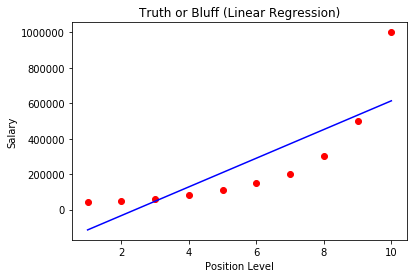

In [10]:
%matplotlib inline
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### Visualising the Polynomial Regression results

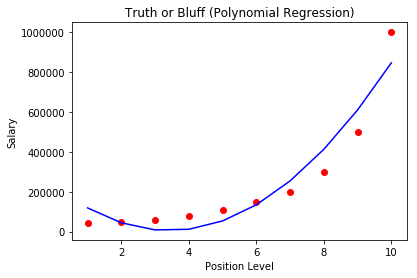

In [11]:
plt.scatter(X, y, color='red')
plt.plot(X, poly_lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
#plt.plot(X, poly_lin_reg.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### Visualising the Polynomial Regression results (with degree 3)

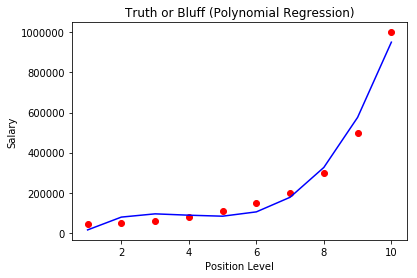

In [12]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y)
plt.scatter(X, y, color='red')
plt.plot(X, poly_lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### Visualising the Polynomial Regression results (with degree 4)

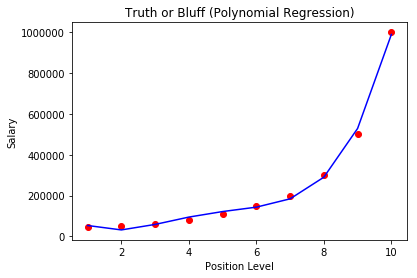

In [13]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y)
plt.scatter(X, y, color='red')
plt.plot(X, poly_lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### A more advanced plot that has a smaller step size than just 1

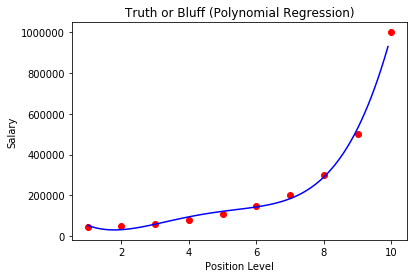

In [14]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y)
X_grid = np.arange(min(X), max(X), 0.1) #gives us vector
X_grid = X_grid.reshape((len(X_grid), 1)) #reshapes into matrix
plt.scatter(X, y, color='red')
plt.plot(X_grid, poly_lin_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

As you can see we have a more continuous curve!

#### Predicting a new result with Linear Regression

In [15]:
lin_reg.predict(6.5)

array([ 330378.78787879])

#### Predicting a new result with Polynomial Regression

In [16]:
poly_lin_reg.predict(poly_reg.fit_transform(6.5))

array([ 158862.45265152])